In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.text import *

## Criando o databunch para o LM

In [3]:
data_lm = TextLMDataBunch.from_csv('.','Data.csv',delimiter='|',text_cols='textos',label_cols='macrotemas')
data_lm.save('data_lm')

In [4]:
data_lm.show_batch()

idx,text
0,"2 ° , do art . 55 do xxmaj regimento xxmaj interno da xxup anvisa , aprovado nos termos do xxmaj anexo i da xxmaj portaria nº 354 da xxup anvisa , de 11 de agosto de 2006 , republicada no xxup dou de 21 de agosto de 2006 , e a xxmaj portaria n ° 1017 , de 5 de dezembro de 2007 , \n considerando o disposto"
1,"o controle das áreas de estoque de componentes , materiais de fabricação e produtos acabados para evitar inversões ( trocas ) , danos , deteriorização ou outros efeitos adversos no período anterior à sua distribuição ou uso . \n ( b ) xxmaj cada fabricante deverá estabelecer e manter procedimentos para autorizar o recebimento ou retirada das áreas de estoque . xxmaj qualquer controle numérico ou outra forma de"
2,"% ( p / v ) em clorofórmio . xxmaj observar à luz ultravioleta de onda longa ( 365 xxunk ) . xxmaj serão observadas duas manchas com xxmaj rf próximos , respectivamente , a 0,22 e xxunk . \n xxmaj conservação \n xxmaj em frasco de vidro neutro , âmbar , hermeticamente fechado , ao abrigo da luz e do calor . \n xxmaj forma derivada"
3,"ficam também sob controle todos os sais e isômeros das substâncias enumeradas acima , sempre que seja possível a sua existência . \n 2 ) fica autorizado o uso de xxup lindano como padrão analítico para fins laboratoriais ou monitoramento de resíduos ambientais , conforme legislação específica . xxbos xxup resolução xxup de xxup diretoria xxup colegiada - xxup rdc xxmaj nº 18 , xxup de 12 xxup de"
4,"reprografia , manutenção da infraestrutura física , mensageria , emissão de passagens aéreas , aquisição de bens de consumo e bens permanentes , atividades gerais de administração e engenharia , de responsabilidade da xxmaj agência , no âmbito do xxmaj distrito xxmaj federal ; \n xxup iii – propor procedimentos relativos à gestão de atividades e serviços de logística da xxmaj anvisa no âmbito do xxmaj distrito xxmaj federal"


## Treinando o LM

In [4]:
learn_lm = language_model_learner(data_lm, AWD_LSTM, drop_mult = 0.5, pretrained=False, callback_fns=ShowGraph)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


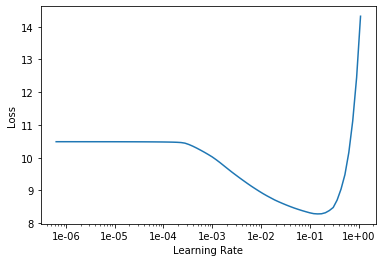

In [6]:
learn_lm.lr_find()
learn_lm.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,3.753799,3.664731,0.381841,03:20
1,2.628968,2.870552,0.472012,03:20
2,2.427556,2.644896,0.495405,03:20
3,2.475480,2.621188,0.494432,03:20
4,2.475948,2.594481,0.496488,03:20
5,2.397542,2.551999,0.503365,03:20
6,2.436933,2.485989,0.511909,03:20
7,2.263047,2.437244,0.520211,03:20
8,2.231137,2.350238,0.533918,03:20
9,2.062670,2.278222,0.546588,03:20


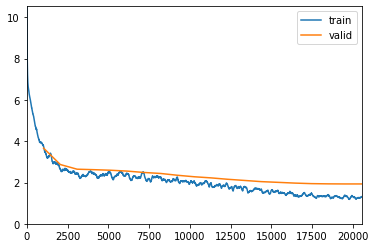

Better model found at epoch 0 with accuracy value: 0.3818407356739044.
Better model found at epoch 1 with accuracy value: 0.4720115065574646.
Better model found at epoch 2 with accuracy value: 0.4954052269458771.
Better model found at epoch 4 with accuracy value: 0.4964875280857086.
Better model found at epoch 5 with accuracy value: 0.5033648610115051.
Better model found at epoch 6 with accuracy value: 0.5119093656539917.
Better model found at epoch 7 with accuracy value: 0.5202112793922424.
Better model found at epoch 8 with accuracy value: 0.5339184403419495.
Better model found at epoch 9 with accuracy value: 0.5465880036354065.
Better model found at epoch 10 with accuracy value: 0.5545252561569214.
Better model found at epoch 11 with accuracy value: 0.566081166267395.
Better model found at epoch 12 with accuracy value: 0.5766850113868713.
Better model found at epoch 13 with accuracy value: 0.5882808566093445.
Better model found at epoch 14 with accuracy value: 0.5962914228439331.
Be

In [5]:
max_lr = 1e-2
learn_lm.fit_one_cycle(20, max_lr=max_lr, moms=(0.8,0.7), callbacks=[callbacks.SaveModelCallback(learn_lm, every='improvement', monitor='accuracy', name='learn_lm')])

In [6]:
#Carrego a melhor versão do language model
learn_lm.load('learn_lm')
learn_lm.save_encoder('enc')

In [7]:
print(learn_lm.predict('Art. 1º Esta resolução visa',n_words=200,temperature=0.8))

Art. 1º Esta resolução visa ser tendo em vista os riscos oferecidos à saúde humana e ao meio ambiente decorrentes da alteração da finalidade a que se destina , conforme Anexo II desta Resolução . Esta Resolução se aplica a todos os produtos sujeitos à vigilância sanitária , inclusive aqueles destinados exclusivamente à exportação e aos produtos abrangidos por este regulamento . 
 
  Art . 2º As empresas têm o prazo de 180 ( cento e oitenta ) dias , a contar da data da publicação deste Regulamento , para se adequarem ao mesmo . 
  Art . 3º Esta Resolução entra em vigor na data de sua publicação e revogam - se as disposições em contrário . 
  GONZALO VECINA NETO xxbos RESOLUÇÃO DA DIRETORIA COLEGIADA – RDC Nº 44 , DE 18 DE AGOSTO DE 2007 
  ( Publicada no DOU nº 184 , de 23 de setembro de 2009 ) 
  ( Revogada pela Resolução – RDC nº 23 , de 20 de maio de 2009 ) 
  Dispõe sobre o


## Criando o databunch para o classificador

In [8]:
data_clas = TextClasDataBunch.from_csv('.','Data.csv',delimiter='|',
                                       text_cols='textos',label_cols='macrotemas',vocab=data_lm.vocab)
data_clas.save('data_clas')

In [10]:
data_clas.show_batch()

text,target
"xxbos xxup resolução xxup da xxup diretoria xxup xxunk - xxup rdc xxmaj nº 199 , xxup de 12 xxup de xxup julho xxup de 2002 \n \n ( xxmaj publicada no xxup dou nº 135 , de 16 de julho de 2002 ) \n \n ( xxmaj republicada no xxup dou nº 214 , de 08 de novembro de 2005 ) \n \n ( xxmaj republicada",farmacopeia
"xxbos xxup resolução xxup de xxup diretoria xxup colegiada – xxup rdc xxmaj nº 347 , xxup de 16 xxup de xxup dezembro xxup de 2002 \n ( xxmaj publicada em xxup dou nº 252 , de 31 de dezembro de 2002 ) \n o xxmaj diretor - xxmaj presidente da xxmaj agência xxmaj nacional de xxmaj vigilância xxmaj sanitária , no uso da atribuição que lhe confere",agrotóxicos
"xxbos xxup resolução xxup de xxup diretoria xxup colegiada - xxup rdc n ° 61 , xxup de 3 xxup de xxup fevereiro xxup de 2016 \n ( xxmaj publicada em xxup dou nº 25 , de 5 de fevereiro de 2016 ) \n xxmaj observação : xxmaj esta xxmaj resolução foi também alterada pela xxmaj resolução – xxup rdc nº 115 , de 5 de outubro de",gestão interna
"xxbos xxup resolução xxup de xxup diretoria xxup colegiada - xxup rdc xxmaj nº 81 , xxup de 05 xxup de xxup novembro xxup de 2008 ( * ) \n ( xxmaj publicada em xxup dou nº 216 , de 06 de novembro de 2008 ) \n ( xxmaj republicada em xxup dou nº 219 , de 11 de novembro de 2008 ) \n ( xxmaj revogadas","portos, aeroportos e fronteiras"
"xxbos xxup resolução xxup de xxup diretoria xxup colegiada – xxup rdc xxmaj nº 67 , xxup de 8 xxup de xxup outubro xxup de 2007 \n ( xxmaj publicada em xxup dou nº 195 , de 9 de outubro de 2007 ) \n a xxmaj diretoria xxmaj colegiada da xxmaj agência xxmaj nacional de xxmaj vigilância xxmaj sanitária , no uso da atribuição que lhe confere o",serviços de saúde


## Treinando o classificador

In [5]:
data_clas = load_data('.','data_clas')
learn_clas = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5, callback_fns=ShowGraph, pretrained=False)
learn_clas.load_encoder('enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (1439 items)
x: TextList
xxbos xxup resolução xxup da xxup diretoria xxup colegiada – xxup rdc xxmaj nº 39 , xxup de 9 xxup de xxup julho xxup de 2012 
  ( xxmaj publicada no xxup dou nº 132 , de 10 de julho de 2012 ) 
  ( xxmaj revogada tacitamente pela xxmaj resolução nº 6 , de 18 de fevereiro de 2014 , conforme declarado pelo xxmaj despacho nº 56 , de 27 de março de 2018 ) 
  xxmaj dispõe sobre a atualização do xxmaj anexo i , xxmaj listas de xxmaj substâncias xxmaj entorpecentes , xxmaj psicotrópicas , xxmaj precursoras e xxmaj outras sob xxmaj controle xxmaj especial , da xxmaj portaria xxup svs / xxup ms nº 344 , de 12 de maio de 1998 e dá outras providências . 
  a xxmaj diretoria xxmaj colegiada da xxmaj agência xxmaj nacional de xxmaj vigilância xxmaj sanitária , no uso da atribuição que lhe confere o art . 11 , inciso xxup iv , do xxmaj regulamento da xxmaj agência xxmaj nacional de xxmaj vigilância xxmaj sanitária , aprova

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


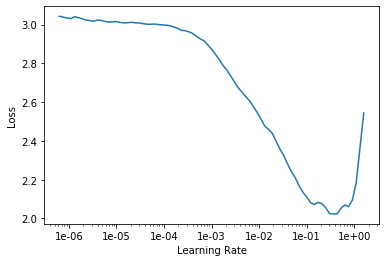

In [6]:
learn_clas.lr_find()
learn_clas.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,2.382288,2.460260,0.432133,03:04
1,1.877629,1.568042,0.689751,03:15
2,1.498660,1.025440,0.728532,03:14
3,1.222224,0.918846,0.770083,03:07
4,1.037361,0.888769,0.756233,03:15
5,0.884996,1.021344,0.728532,03:05
6,0.749257,1.053067,0.756233,03:07
7,0.651155,0.900122,0.770083,03:13
8,0.585882,0.851313,0.783934,03:13
9,0.512405,0.838984,0.789474,02:59


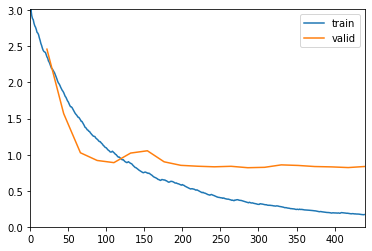

Better model found at epoch 0 with accuracy value: 0.4321329593658447.
Better model found at epoch 1 with accuracy value: 0.6897506713867188.
Better model found at epoch 2 with accuracy value: 0.7285318374633789.
Better model found at epoch 3 with accuracy value: 0.7700831294059753.
Better model found at epoch 8 with accuracy value: 0.7839335203170776.
Better model found at epoch 9 with accuracy value: 0.7894737124443054.
Better model found at epoch 10 with accuracy value: 0.7977839112281799.
Better model found at epoch 11 with accuracy value: 0.8033241033554077.


In [7]:
max_lr = 1e-2
learn_clas.fit_one_cycle(20, max_lr=max_lr , moms=(0.8,0.7), callbacks=[callbacks.SaveModelCallback(learn_clas, every='improvement', monitor='accuracy', name='learn_clas')])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


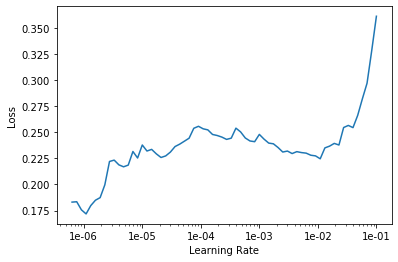

In [8]:
#carrego a melhor versão do classificador
learn_clas.load('learn_clas')
learn_clas.unfreeze()
learn_clas.lr_find()
learn_clas.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.239840,0.827456,0.797784,03:17
1,0.248831,0.804565,0.797784,03:28
2,0.241305,0.794420,0.806094,03:30
3,0.215021,0.790218,0.814404,03:17
4,0.197273,0.787011,0.814404,03:20
5,0.183907,0.802591,0.800554,03:25
6,0.189649,0.791516,0.817174,03:25
7,0.183543,0.763828,0.819945,03:23
8,0.171522,0.769155,0.811634,03:19
9,0.162350,0.774755,0.822715,03:22


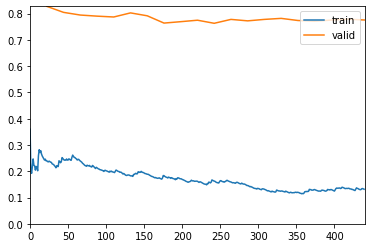

Better model found at epoch 0 with accuracy value: 0.7977839112281799.
Better model found at epoch 2 with accuracy value: 0.8060941696166992.
Better model found at epoch 3 with accuracy value: 0.8144044280052185.
Better model found at epoch 6 with accuracy value: 0.81717449426651.
Better model found at epoch 7 with accuracy value: 0.8199446201324463.
Better model found at epoch 9 with accuracy value: 0.8227146863937378.


In [9]:
lr_min = 1e-5
lr_max = 1e-3
learn_clas.fit_one_cycle(20, max_lr=slice(lr_min,lr_max), moms=(0.8,0.7), callbacks=[callbacks.SaveModelCallback(learn_clas, every='improvement', monitor='accuracy', name='learn_clas_ft')])

## Avaliando os Resultados

In [10]:
data_clas = load_data('.','data_clas')

In [11]:
learn_clas = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5, callback_fns=ShowGraph, pretrained=False)
learn_clas.load('learn_clas_ft')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (1439 items)
x: TextList
xxbos xxup resolução xxup da xxup diretoria xxup colegiada – xxup rdc xxmaj nº 39 , xxup de 9 xxup de xxup julho xxup de 2012 
  ( xxmaj publicada no xxup dou nº 132 , de 10 de julho de 2012 ) 
  ( xxmaj revogada tacitamente pela xxmaj resolução nº 6 , de 18 de fevereiro de 2014 , conforme declarado pelo xxmaj despacho nº 56 , de 27 de março de 2018 ) 
  xxmaj dispõe sobre a atualização do xxmaj anexo i , xxmaj listas de xxmaj substâncias xxmaj entorpecentes , xxmaj psicotrópicas , xxmaj precursoras e xxmaj outras sob xxmaj controle xxmaj especial , da xxmaj portaria xxup svs / xxup ms nº 344 , de 12 de maio de 1998 e dá outras providências . 
  a xxmaj diretoria xxmaj colegiada da xxmaj agência xxmaj nacional de xxmaj vigilância xxmaj sanitária , no uso da atribuição que lhe confere o art . 11 , inciso xxup iv , do xxmaj regulamento da xxmaj agência xxmaj nacional de xxmaj vigilância xxmaj sanitária , aprova

In [12]:
#carrego a melhor versão do classificador fine tuned
#learn_clas.load('learn_clas_ft')
interp = ClassificationInterpretation.from_learner(learn_clas)

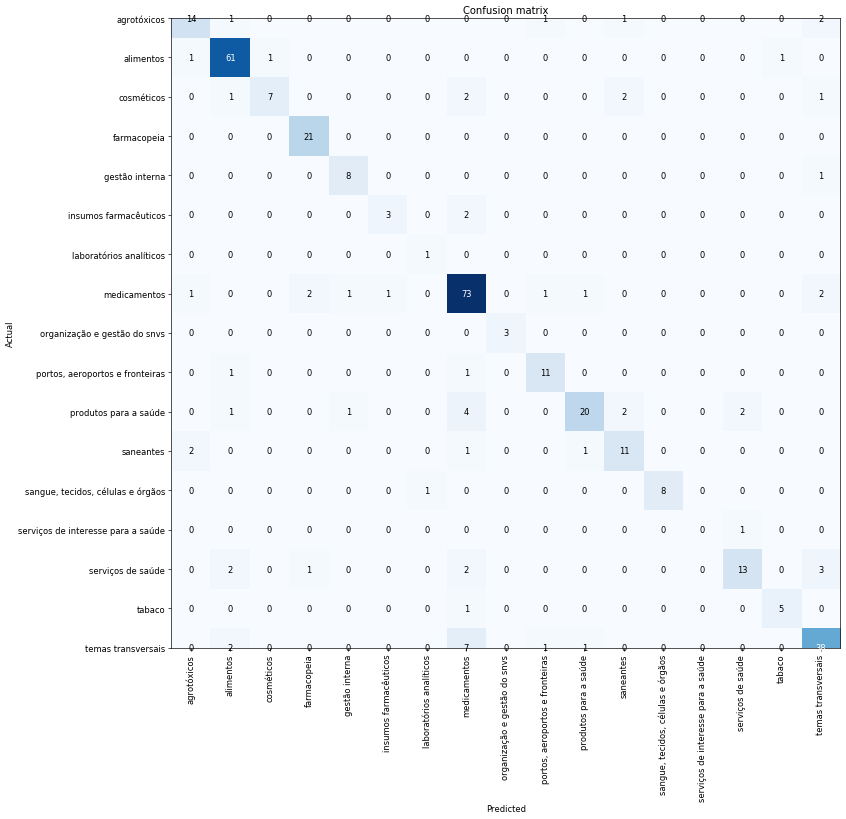

In [14]:
interp.plot_confusion_matrix(figsize=(14,14), dpi=60)

## Agora pegando a representação vetorial das normas

In [15]:
#importando o arquivo que contém as normas na ordem que eu conheço
resolucoes = list(pd.read_csv('Data_cluster.csv',sep='|',encoding='utf-8')['textos'])

In [17]:
#Rodar essa célula se quer a representação do classificador
mbe = learn_clas.model[0]

def masked_concat_pool(outputs, mask):
    "Pool MultiBatchEncoder outputs into one vector [last_hidden, max_pool, avg_pool]."
    output = outputs[-1]
    avg_pool = output.masked_fill(mask[:, :, None], 0).mean(dim=1)
    avg_pool *= output.size(1) / (output.size(1)-mask.type(avg_pool.dtype).sum(dim=1))[:,None]
    max_pool = output.masked_fill(mask[:,:,None], -float('inf')).max(dim=1)[0]
    x = torch.cat([output[:,-1], max_pool, avg_pool], 1)
    return x

In [20]:
data_lm = load_data('.',file='data_lm')
learn_lm = language_model_learner(data_lm, AWD_LSTM, drop_mult = 0.5, pretrained=False, callback_fns=ShowGraph)
learn_lm.load('learn_lm')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (1439 items)
x: LMTextList
xxbos xxup resolução xxup da xxup diretoria xxup colegiada - xxup rdc xxmaj nº 199 , xxup de 26 xxup de xxup dezembro xxup de 2017 
 
  ( xxmaj publicada no xxup dou nº 248 , de 28 de dezembro de 2017 ) 
  xxmaj revoga a xxmaj resolução de xxmaj diretoria xxmaj colegiada - xxup rdc n ° 30 , de 24 de julho de 2015 . 
 
  a xxmaj diretoria xxmaj colegiada da xxmaj agência xxmaj nacional de xxmaj vigilância xxmaj sanitária , no uso da atribuição que lhe conferem o art . 15 , xxup iii e xxup iv aliado ao art . 7º , xxup iii , e xxup iv , da xxmaj lei nº 9.782 , de 26 de janeiro de 1999 , o art . 53 , v , § § 1º e 3º do xxmaj regimento xxmaj interno aprovado nos termos do xxmaj anexo i da xxmaj resolução da xxmaj diretoria xxmaj colegiada – xxup rdc n ° 61 , de 3 de fevereiro de 2016 , resolve adotar a seguinte xxmaj resolução da xxmaj diretoria xxmaj colegiada , conforme deliberado em reunião realizada em 12

In [21]:
#Rodar essa célula se que a representação do language model
mbe = MultiBatchEncoder(70,1400,learn_lm.model[0])

def masked_concat_pool(outputs, mask):
    "Pool MultiBatchEncoder outputs into one vector [last_hidden, max_pool, avg_pool]."
    output = outputs[-1]
    avg_pool = output.masked_fill(mask[:, :, None], 0).mean(dim=1)
    avg_pool *= output.size(1) / (output.size(1)-mask.type(avg_pool.dtype).sum(dim=1))[:,None]
    max_pool = output.masked_fill(mask[:,:,None], -float('inf')).max(dim=1)[0]
    x = torch.cat([output[:,-1], max_pool, avg_pool], 1)
    return x

In [22]:
X = np.zeros((1,1200))
texts = []
for resolucao in resolucoes:
  xb,yb = learn_clas.data.one_item(resolucao)
  sentence = torch.cuda.LongTensor(xb.tolist()[0]).unsqueeze(0)
  raw_outputs, outputs, masks = mbe.forward(sentence)
  sentence_rep = masked_concat_pool(outputs, masks)
  X = np.append(X,sentence_rep,axis=0)

In [23]:
#salvando a matriz de representação das normas em um arquivo
X = np.delete(X, (0), axis=0)
np.save('X_LM', X)